## Example 1. Simple case.

Automatically created module for IPython interactive environment


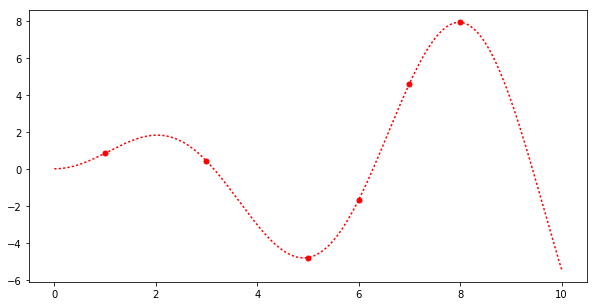

In [1]:
%matplotlib inline
print(__doc__)

# Author: Vincent Dubourg <vincent.dubourg@gmail.com>
#         Jake Vanderplas <vanderplas@astro.washington.edu>
#         Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>s
# License: BSD 3 clause
import numpy as np
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel,WhiteKernel
np.random.seed(1)
def f(x):
    """The function to predict."""
    return x * np.sin(x)
# ----------------------------------------------------------------------
#  First the noiseless case
X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T
# Observations
y = f(X).ravel()
# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(0, 10, 1000)).T
fig = plt.figure(figsize=(10,5))
plt.plot(x, f(x), 'r:', label=u'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label=u'Observations')
plt.show()

http://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.RBF.html

The RBF kernel is a stationary kernel. It is also known as the “squared exponential” kernel. It is parameterized by a length-scale parameter length_scale>0, which can either be a scalar (isotropic variant of the kernel) or a vector with the same number of dimensions as the inputs X (anisotropic variant of the kernel). The kernel is given by:

$k(x_i, x_j) = e^{-0.5||\frac{x_i}{lengthScale}, \frac{x_j}{lengthScale}||_2}$

-48.8342714519
RBF(length_scale=0.957)


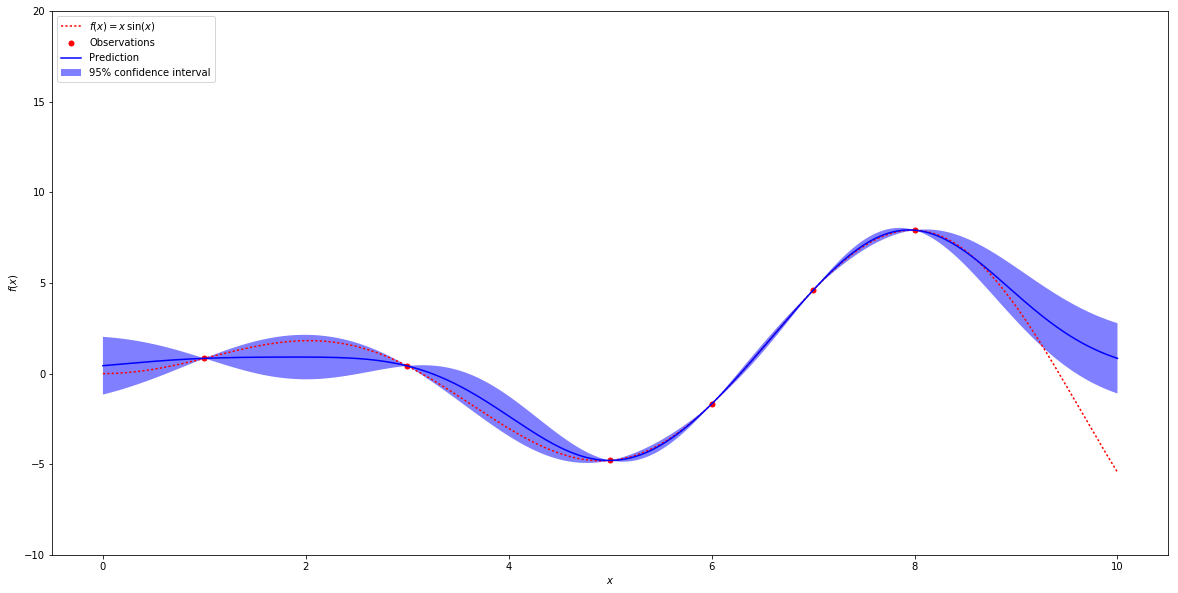

In [5]:
# Instanciate a Gaussian Process model
kernel = RBF(10, (1e-2, 1e2))
#######################################
# However what if we set (0.1,0.1)
#kernel = RBF(0.1, (0.1, 0.1))
#######################################
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=1,random_state=0)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
fig = plt.figure(figsize=(20,10))
plt.plot(x, f(x), 'r:', label=u'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label=u'Observations')
plt.plot(x, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

print gp.log_marginal_likelihood_value_
print gp.kernel_

http://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html#sklearn.gaussian_process.GaussianProcessRegressor

## Example 2. With noise

#### Simple RBF

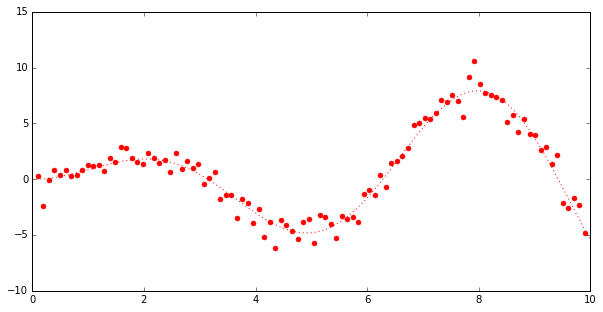

In [3]:
# ----------------------------------------------------------------------
# now the noisy case
np.random.seed(1)
X = np.linspace(0.1, 9.9, 100)
X = np.atleast_2d(X).T

# Observations and noise
y = f(X).ravel()
dy = 0.5 + 1.0 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise
fig = plt.figure(figsize=(10,5))
plt.plot(x, f(x), 'r:', label=u'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label=u'Observations')
plt.show()

### a) Using RBF without adding whitenoise kernel

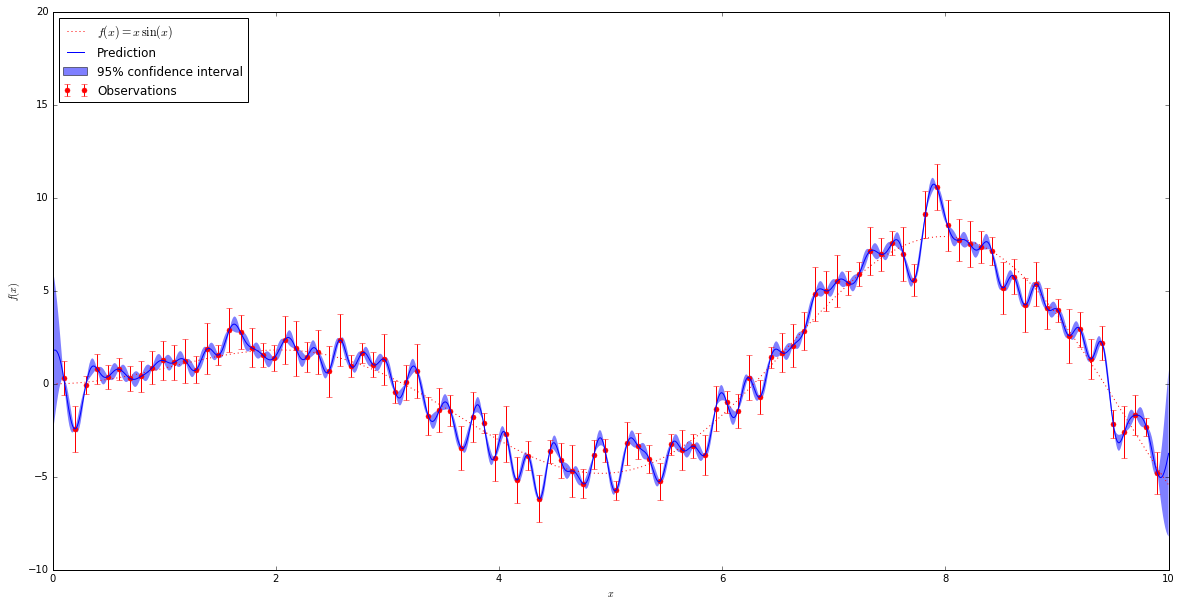

In [4]:
# Instanciate a Gaussian Process model
kernel = 1*RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel,
                              n_restarts_optimizer=20,random_state=1)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

y_pred, sigma = gp.predict(x, return_std=True)
# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
fig = plt.figure(figsize=(20,10))
plt.plot(x, f(x), 'r:', label=u'$f(x) = x\,\sin(x)$')
plt.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10, label=u'Observations')
plt.plot(x, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')
plt.show()

In [5]:
gp.log_marginal_likelihood_value_

-223.96812335750479

In [6]:
gp.kernel_

3.24**2 * RBF(length_scale=0.1)

### b) Adding whiteKernel

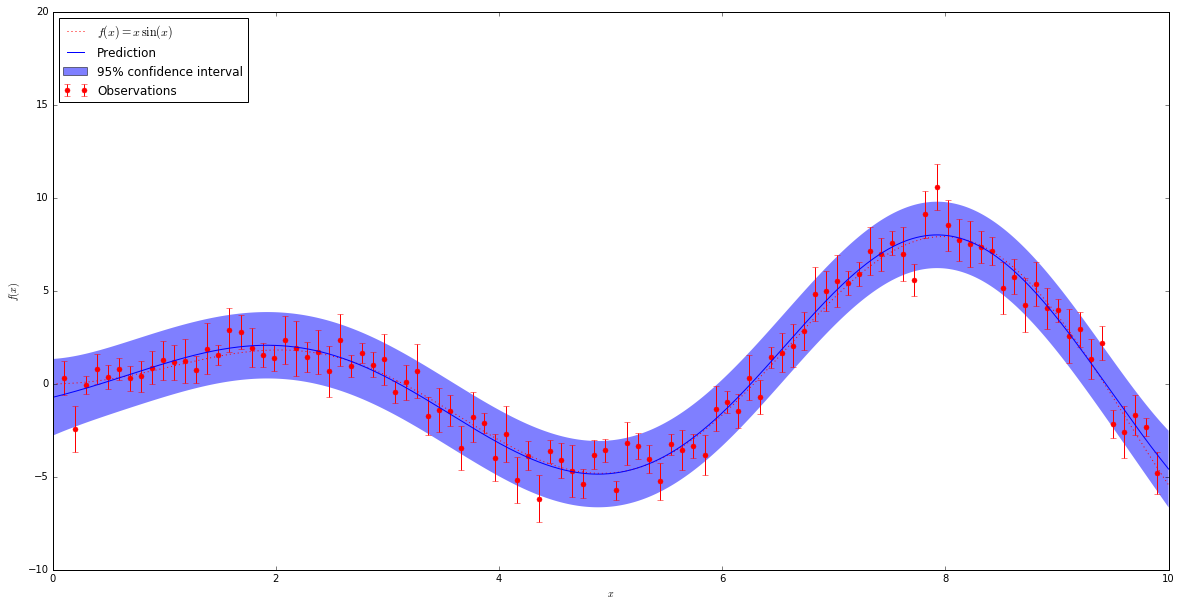

In [6]:
kernel = 1* RBF(length_scale=100.0, length_scale_bounds=(1e-3, 1e3)) \
    + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e10))
gp = GaussianProcessRegressor(kernel=kernel,
                              n_restarts_optimizer=10,random_state=1)
# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
fig = plt.figure(figsize=(20,10))
plt.plot(x, f(x), 'r:', label=u'$f(x) = x\,\sin(x)$')
plt.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10, label=u'Observations')
plt.plot(x, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')


In [7]:
print gp.log_marginal_likelihood_value_
print gp.kernel_

-150.038855762
6.87**2 * RBF(length_scale=1.93) + WhiteKernel(noise_level=0.776)


## c) Prediction 

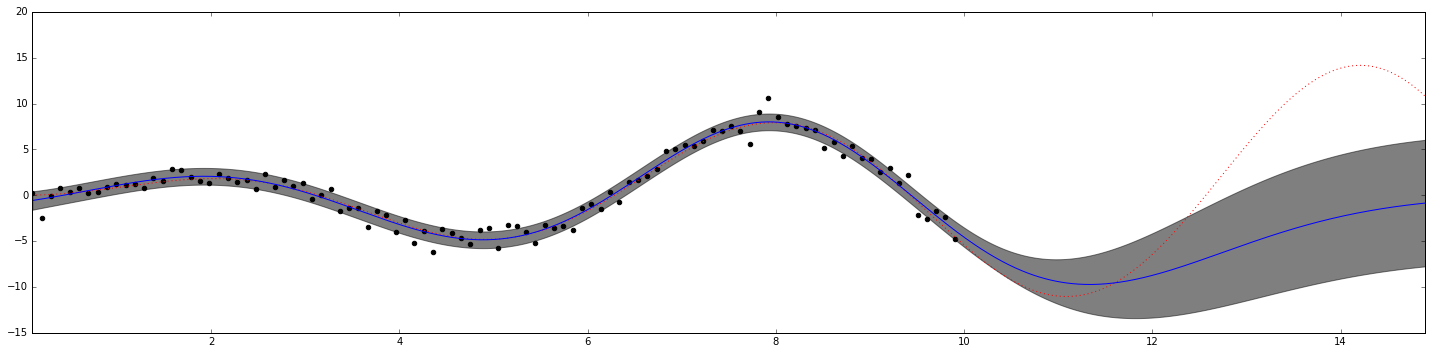

In [8]:
X_ = np.linspace(X.min(), X.max() + 5, 1000)[:, np.newaxis]
y_pred, y_std = gp.predict(X_, return_std=True)

# Illustration
plt.figure(figsize=(20,5))
plt.scatter(X, y, c='k')
plt.plot(X_, f(X_), 'r:', label=u'$f(x) = x\,\sin(x)$')
plt.plot(X_, y_pred)
plt.fill_between(X_[:, 0], y_pred - y_std, y_pred + y_std,
                 alpha=0.5, color='k')
plt.xlim(X_.min(), X_.max())
plt.tight_layout()
plt.show()

## Practice One

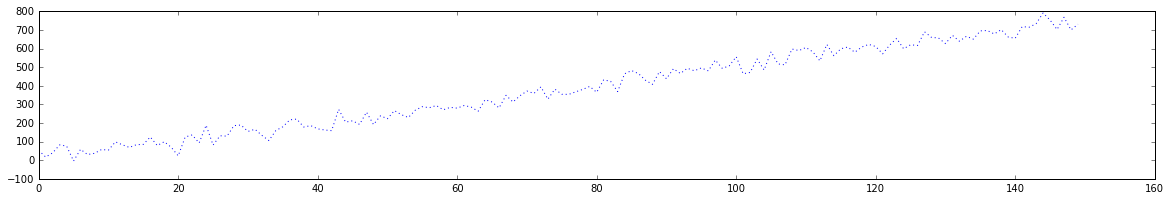

In [15]:
np.random.seed(0)
dy=np.random.randn(150)
y=5*np.asarray(range(150))+dy*30
x=np.asarray(range(150))
plt.figure(figsize=(20,3))
plt.plot(y,"b:")
plt.show()

In [16]:
x_train=x[:100]
x_test=x[100:]
y_train=y[:100]
y_test=y[100:]

### Try to model y using x.

Q1. Please try RBF kernel without whiteKernel. What is the trained parameters?

Q2. Then please plot the prediction for both training and testing data together using trained model. 

Q3. Please try to solve the problem observed in Q1 by adding white noise kernel.

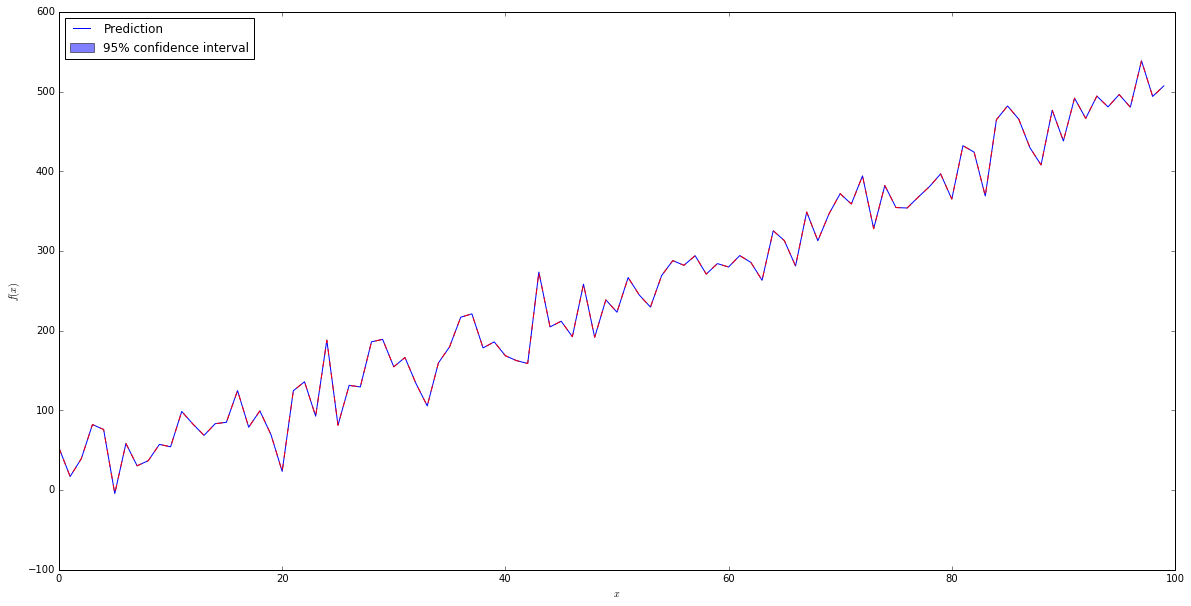

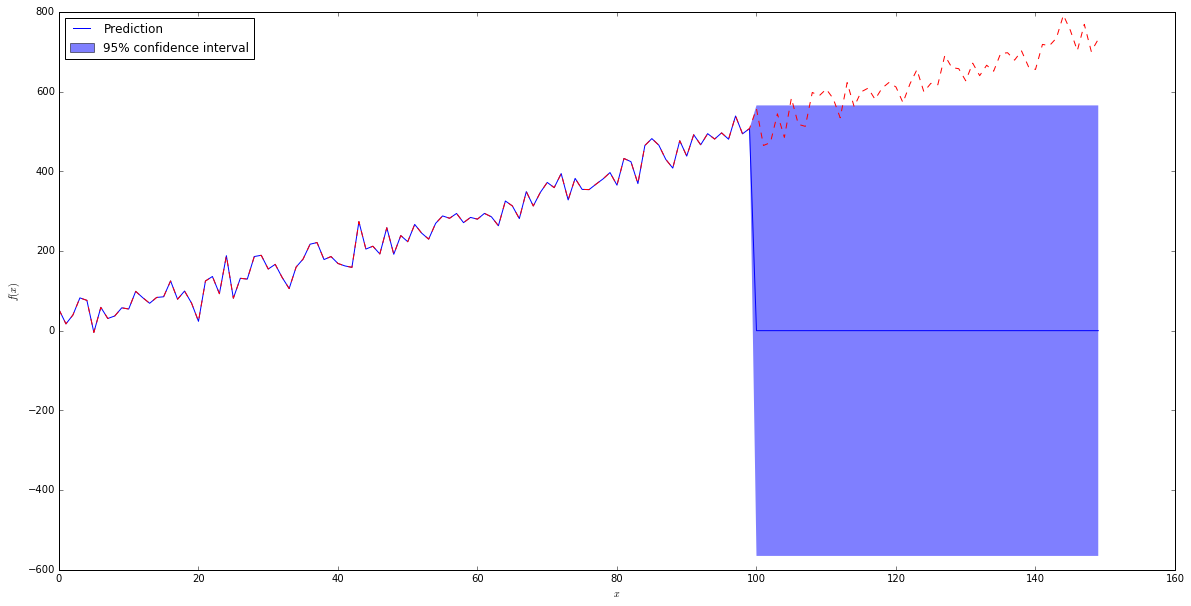

In [19]:
kernel = 1* RBF(length_scale=1.0, length_scale_bounds=(1e-3, 1e3)) \
#      + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e10))
gp = GaussianProcessRegressor(kernel=kernel,
                              n_restarts_optimizer=10,random_state=1)
# Fit to data using Maximum Likelihood Estimation of the parameters

def f(X,y,t=100,train=True):
    if train:
        gp.fit(X, y)
    y_pred, sigma = gp.predict(X, return_std=True)

    # Plot the function, the prediction and the 95% confidence interval based on
    # the MSE
    fig = plt.figure(figsize=(20,10))
    plt.plot(range(t), y_pred, 'b-', label=u'Prediction')
    plt.fill(np.concatenate([range(t), range(t)[::-1]]),
              np.concatenate([y_pred - 1.9600 * sigma,
                             (y_pred + 1.9600 * sigma)[::-1]]),
              alpha=.5, fc='b', ec='None', label='95% confidence interval')
    plt.plot(y,"r--")
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.legend(loc='upper left')
f(x_train.reshape(-1,1),y_train)
f(x.reshape(-1,1),y,t=150,train=False)

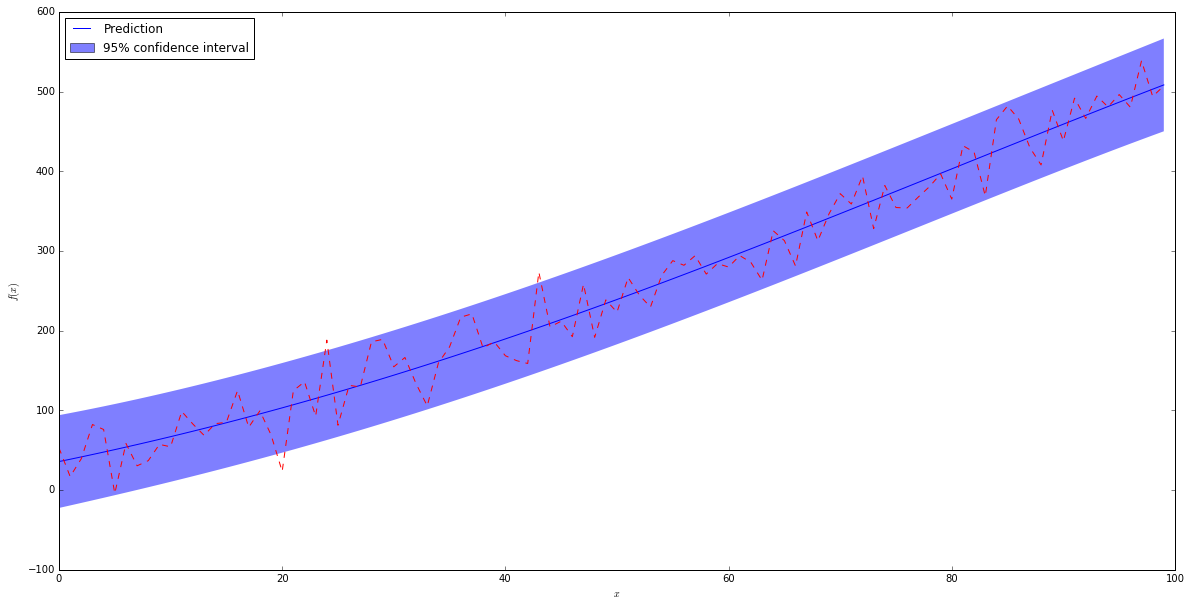

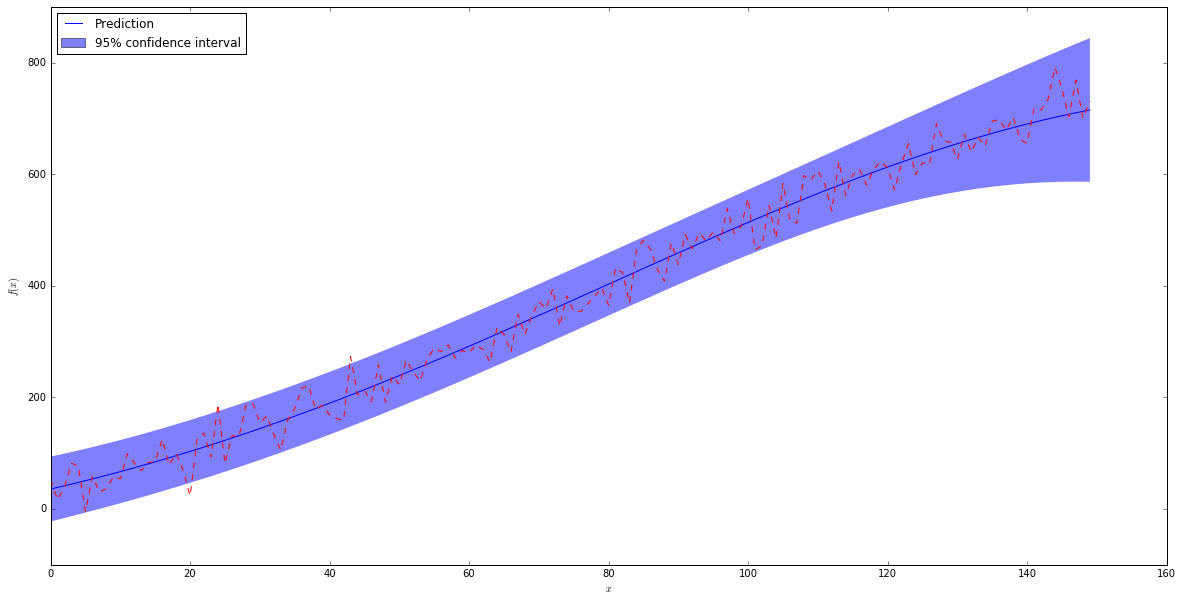

In [20]:
kernel = 1* RBF(length_scale=1.0, length_scale_bounds=(1e-3, 1e3)) \
      + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e10))
gp = GaussianProcessRegressor(kernel=kernel,
                              n_restarts_optimizer=10,random_state=1)
# Fit to data using Maximum Likelihood Estimation of the parameters

def f(X,y,t=100,train=True):
    if train:
        gp.fit(X, y)
    y_pred, sigma = gp.predict(X, return_std=True)

    # Plot the function, the prediction and the 95% confidence interval based on
    # the MSE
    fig = plt.figure(figsize=(20,10))
    plt.plot(range(t), y_pred, 'b-', label=u'Prediction')
    plt.fill(np.concatenate([range(t), range(t)[::-1]]),
              np.concatenate([y_pred - 1.9600 * sigma,
                             (y_pred + 1.9600 * sigma)[::-1]]),
              alpha=.5, fc='b', ec='None', label='95% confidence interval')
    plt.plot(y,"r--")
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.legend(loc='upper left')
f(x_train.reshape(-1,1),y_train)
f(x.reshape(-1,1),y,t=150,train=False)

### Example 4, Multivariate Model.

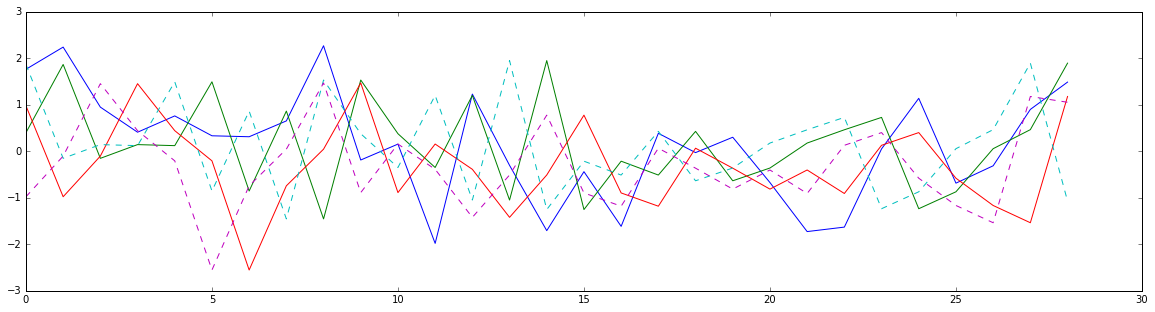

In [21]:
np.random.seed(0)
seq = np.random.randn(30,3)[:,:]
target=seq[1:,1:]
seq=seq[:-1,:]

plt.figure(figsize=(20,5))
plt.plot(seq)
plt.plot(target,"--")
plt.show()

In [22]:
kernel = 1* RBF(length_scale=100.0, length_scale_bounds=(1e-3, 1e3)) \
    + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e10))
gp = GaussianProcessRegressor(kernel=kernel,
                              n_restarts_optimizer=10,random_state=1)
# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(seq, target)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1**2 * RBF(length_scale=100) + WhiteKernel(noise_level=1),
             n_restarts_optimizer=10, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=1)

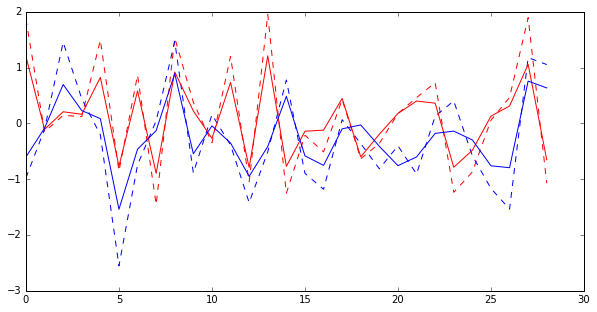

In [24]:
y_pred=gp.predict(seq)
fig = plt.figure(figsize=(10,5))
plt.plot(range(29), target[:,0], 'r--', )
plt.plot(range(29), target[:,1], 'b--', )
plt.plot(range(29), y_pred[:,0], 'r', )
plt.plot(range(29), y_pred[:,1], 'b', )
# plt.plot(X, y, 'r.', markersize=10, label=u'Observations')
# plt.show()

In [25]:
gp.kernel_

0.784**2 * RBF(length_scale=0.592) + WhiteKernel(noise_level=0.375)

### Example 5: Modeling The Passengers' number

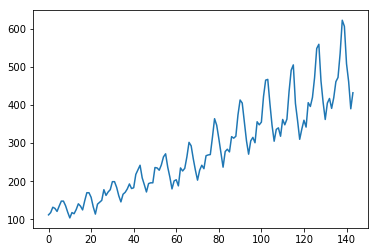

-304.473288827
264**2 * RBF(length_scale=144) + 32.2**2 * RBF(length_scale=92.6) * ExpSineSquared(length_scale=0.668, periodicity=12) + 194**2 * RationalQuadratic(alpha=0.000487, length_scale=53.1) + 4.72**2 * RBF(length_scale=0.1) + WhiteKernel(noise_level=0.0102)


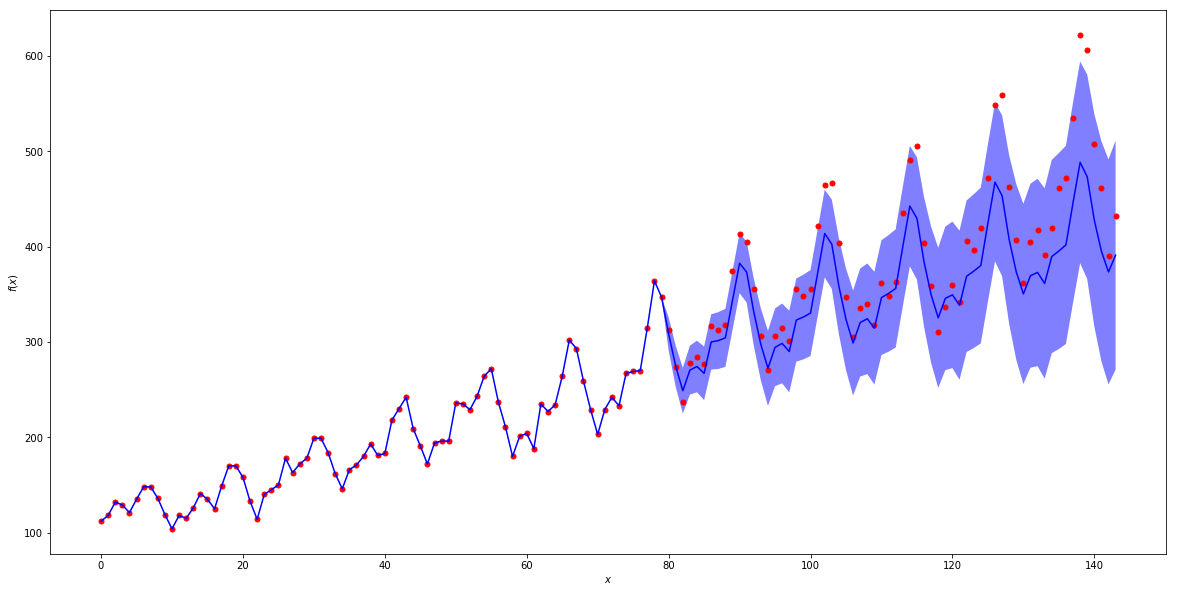

In [64]:
import pandas as pd
from sklearn.gaussian_process.kernels import RBF, ConstantKernel,WhiteKernel,RationalQuadratic,Exponentiation,ExpSineSquared
dataset = pd.read_csv('https://serv.cusp.nyu.edu/classes/ML_2016_Spring/ML_2017/GP_Inter_P.csv')
dataset.columns=["year","x"]
dataset=dataset.iloc[:-1,[1]]
dataset.index=range(len(dataset))

Train=dataset[:80]
Test=dataset[80:]
plt.plot(dataset)
plt.show()

dd=Train

# Kernel with optimized parameters
k1 = 10**2 * RBF(length_scale=50.0)  # long term smooth rising trend
k2 = 50**2* RBF(length_scale=100.0) \
    * ExpSineSquared(length_scale=1.0, periodicity=12.0,
                     periodicity_bounds="fixed")  # seasonal component
# medium term irregularities
k3 = 10**2 * RationalQuadratic(length_scale=1.0, alpha=1.0)
k4 = ConstantKernel(1) * RBF(length_scale=0.1) \
    + WhiteKernel(noise_level=0.1**2,
                  noise_level_bounds=(1e-3, 199))  # noise terms
kernel = k1 + k2 + k3 + k4

gp = GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=20,random_state=1)
# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(np.asarray(dd.index).reshape(-1,1), np.asarray(dd))
y_pred, sigma = gp.predict(np.asarray(dd.index).reshape(-1,1), return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE

dd=dataset
y_pred, sigma = gp.predict(np.asarray(dd.index).reshape(-1,1), return_std=True)

fig = plt.figure(figsize=(20,10))
plt.plot(range(len(dd)), np.asarray(dd), 'r.', markersize=10, label=u'Observations')
plt.plot(range(len(dd)), y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([range(len(dd)), range(len(dd))[::-1]]),
         np.concatenate([y_pred[:,0] - 1.9600 * sigma,
                        (y_pred[:,0] + 1.9600 * sigma)[::-1]]),
          alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

print gp.log_marginal_likelihood_value_
print gp.kernel_

## Practice 2: 

The data consists of the monthly average atmospheric CO2 concentrations (in parts per million by volume (ppmv)) collected at the Mauna Loa Observatory in Hawaii,

    decimal  average
0  1958.208   315.71
1  1958.292   317.45
2  1958.375   317.50
3  1958.542   315.86
4  1958.625   314.93


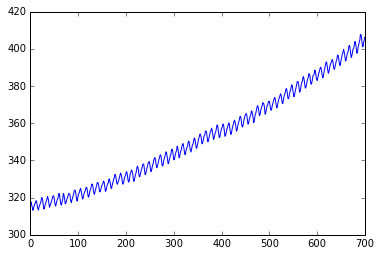

In [26]:
import pandas as pd
Data2=pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/ML_2017/GP_CO2.csv")[1:].iloc[:,0].apply(lambda x: pd.Series(x.split()))
Data2.columns=["year","month","decimal","average","interpolated","trend","season corr"]
Data2=Data2.applymap(float)
Data2=Data2[Data2.average>Data2.average.quantile(0.001)]
Data2.index=range(len(Data2))
Data2=Data2.loc[:,["decimal","average"]]
print Data2.head()
Data2.average.plot()

In [22]:
train=Data2[:600]
test=Data2[600:]

### question:
Try to model the monthly average atmospheric CO2 concentrations (in parts per million by volume (ppmv)) collected at the Mauna Loa Observatory in Hawaii using the time: decimal which represents the year in decimal. Then predict for following years. 

Automatically created module for IPython interactive environment

Learned kernel: 49.3**2 * RBF(length_scale=37.5) + 3.15**2 * RBF(length_scale=189) * ExpSineSquared(length_scale=1.52, periodicity=1) + 9.92**2 * RationalQuadratic(alpha=0.000378, length_scale=6.16) + 49.3**2 * RBF(length_scale=37.5) + WhiteKernel(noise_level=0.0426)
Log-marginal-likelihood: -184.186


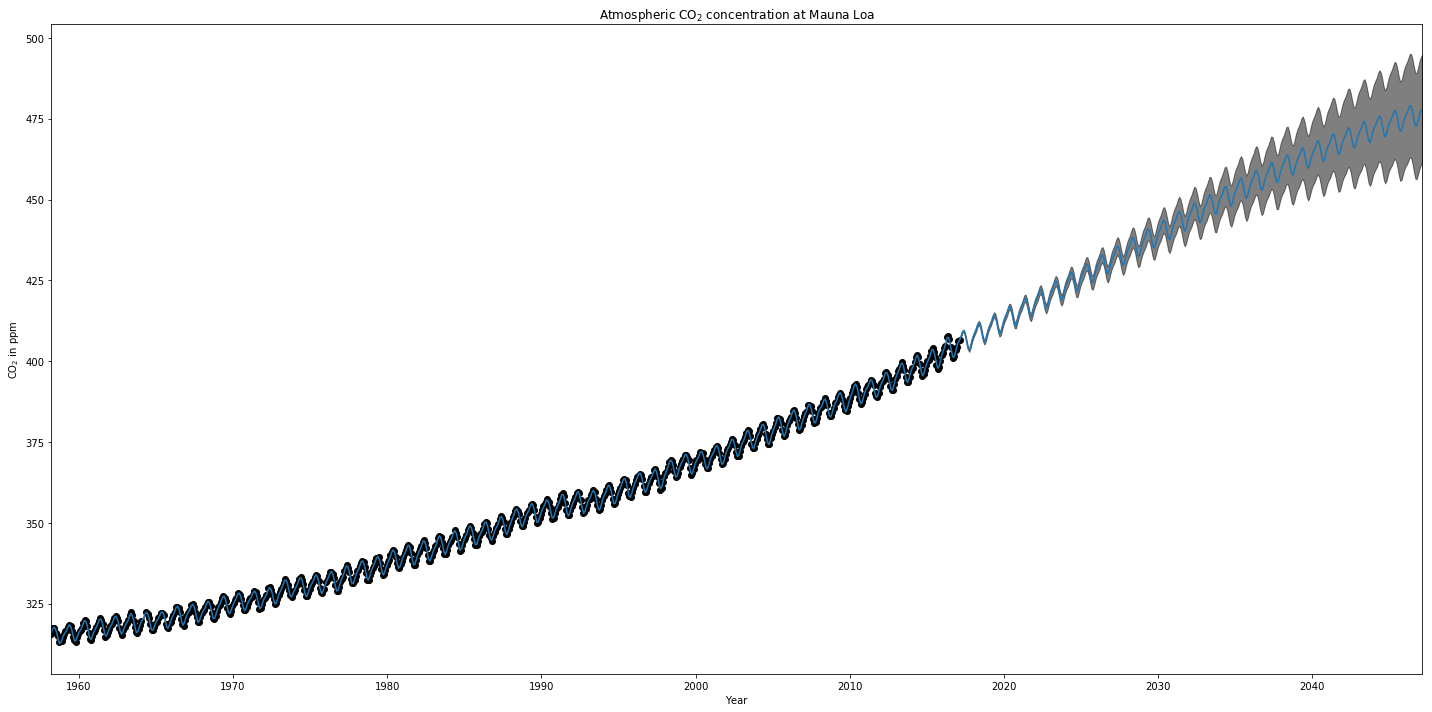

In [27]:
print(__doc__)

# Authors: Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>
#
# License: BSD 3 clause

import numpy as np

from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels \
    import RBF, WhiteKernel, RationalQuadratic, ExpSineSquared
from sklearn.datasets import fetch_mldata

X = np.asarray(Data2.decimal).reshape(-1,1)
y = np.asarray(Data2.average)

# Kernel with optimized parameters
k1 = 1 * RBF(length_scale=1.0)  # long term smooth rising trend
k2 = 1 * RBF(length_scale=1.0) \
    * ExpSineSquared(length_scale=1.0, periodicity=1.0,
                     periodicity_bounds="fixed")  # seasonal component
# medium term irregularities
k3 = 1 * RationalQuadratic(length_scale=1.0, alpha=1.0)
k4 = 1 * RBF(length_scale=1.0) \
    + WhiteKernel(noise_level=1.0,
                  noise_level_bounds=(1e-3, 1e3))  # noise terms
kernel = k1 + k2 + k3 + k4

gp = GaussianProcessRegressor(kernel=kernel, alpha=0,
                              normalize_y=True)
gp.fit(X, y)

print("\nLearned kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"
      % gp.log_marginal_likelihood(gp.kernel_.theta))

X_ = np.linspace(X.min(), X.max() + 30, 1000)[:, np.newaxis]
y_pred, y_std = gp.predict(X_, return_std=True)

# Illustration
plt.figure(figsize=(20,10))
plt.scatter(X, y, c='k')
plt.plot(X_, y_pred)
plt.fill_between(X_[:, 0], y_pred - y_std, y_pred + y_std,
                 alpha=0.5, color='k')
plt.xlim(X_.min(), X_.max())
plt.xlabel("Year")
plt.ylabel(r"CO$_2$ in ppm")
plt.title(r"Atmospheric CO$_2$ concentration at Mauna Loa")
plt.tight_layout()
plt.show()

# Gaussian Process Classification (Quick Example on Iris Data)

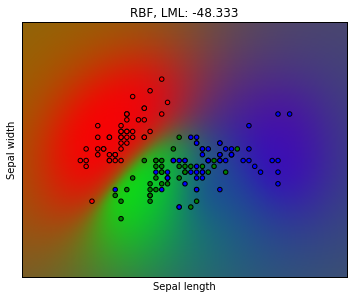

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = np.array(iris.target, dtype=int)

h = .02  # step size in the mesh

kernel = 1.0 * RBF([1.0])
gpc_rbf = GaussianProcessClassifier(kernel=kernel).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

plt.figure(figsize=(5, 5))
    # Plot the predicted probabilities. For that, we will assign a color to
    # each point in the mesh [x_min, m_max]x[y_min, y_max].
plt.subplot(1, 1, 1)
Z = gpc_rbf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape((xx.shape[0], xx.shape[1], 3))
plt.imshow(Z, extent=(x_min, x_max, y_min, y_max), origin="lower")

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=np.array(["r", "g", "b"])[y])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title("%s, LML: %.3f" %
          ("RBF", gpc_rbf.log_marginal_likelihood(gpc_rbf.kernel_.theta)))

plt.tight_layout()
plt.show()